In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.17.0'

In [7]:
ds=pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')


In [8]:
X = ds.iloc[:,1:-1].values
Y = ds.iloc[:,-1].values

In [9]:
print(X)

[[80.0 0 1 ... 25.19 6.6 140]
 [54.0 0 0 ... 27.32 6.6 80]
 [28.0 0 0 ... 27.32 5.7 158]
 ...
 [66.0 0 0 ... 27.83 5.7 155]
 [24.0 0 0 ... 35.42 4.0 100]
 [57.0 0 0 ... 22.43 6.6 90]]


In [10]:
print(Y)

[0 0 0 ... 0 0 0]


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds["gender"]=le.fit_transform(ds["gender"])
ds["smoking_history"]=le.fit_transform(ds["smoking_history"])
X=ds.drop("diabetes",axis=1)
Y=ds["diabetes"]

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
ann = tf.keras.models.Sequential()

In [57]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [58]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [59]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Change units to 1 and activation to sigmoid for binary classification

In [60]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
s=ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0821
Epoch 2/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9712 - loss: 0.0829
Epoch 3/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9716 - loss: 0.0817
Epoch 4/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9712 - loss: 0.0824
Epoch 5/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9716 - loss: 0.0817
Epoch 6/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9710 - loss: 0.0824
Epoch 7/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.0810
Epoch 8/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0822
Epoch 9/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9720 - loss: 0.0810
Epoch 10/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9716 - loss: 0.0814
Epoch 11/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9705 - loss: 0.0834
Epoch 12/100
2500/2

In [63]:
output = ann.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [64]:
loss,accu=ann.evaluate(x_test,y_test)
print(loss,accu)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9728 - loss: 0.0836
0.08181051164865494 0.9724500179290771


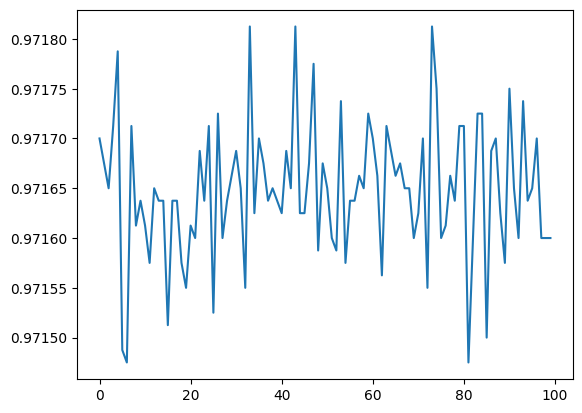

In [73]:
plt.plot(s.history['accuracy'])